In [2]:
import sqlite3

from main import setup1, setup2

# setup1()
# setup2()

# from django.db import connection 

import psycopg2

In [3]:
# from asgiref.sync import sync_to_async

# @sync_to_async
def run_query(query):
    result = None
    try:
        connection = psycopg2.connect("dbname=data user=root password=root")
        # Connect to DB and create a cursor
        # sqlite_connection = sqlite3.connect('db.sqlite3')
        cursor = connection.cursor()
        cursor.execute(query) 
        # Fetch and output result
        result = cursor.fetchall()
        # Close the cursor
        cursor.close()
        
    # Handle errors
    # except sqlite3.Error as error:
        # print('Error occurred - ', error)
 
    # Close DB Connection irrespective of success
    # or failure
    finally:
        if connection:
            connection.close()
    return result

In [4]:
def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
        return content
    except FileNotFoundError:
        return None
    # except IOError as e:
    #     return None
    

def run_query_file(path):
    query = read_file(path)
    return run_query(query)

In [5]:

rows = run_query_file(
    'sql_queries/averages.sql'
)

print("name, numplayers, avg(number_of_turns), stddev (number_of_turns), variance (number_of_turns), min(number_of_turns), max(number_of_turns)")
for row in rows:
    print(", ".join([str(i) for i in row]))


name, numplayers, avg(number_of_turns), stddev (number_of_turns), variance (number_of_turns), min(number_of_turns), max(number_of_turns)
NewBiggestFirst, 1, 13.5780000000000000, 4.4239673922269689, 19.5714874874874875, 4, 43
NewBiggestFirst, 2, 13.7040000000000000, 4.7754146569995963, 22.8045851462865716, 4, 54
NewBiggestFirst, 3, 13.6206666666666667, 4.7547387743552868, 22.6075408123576152, 4, 59
Replacement, 1, 13.5960000000000000, 5.5883820569118227, 31.2300140140140140, 4, 90
Replacement, 2, 13.8845000000000000, 7.1363079721147277, 50.9268914728682171, 4, 153
Replacement, 3, 14.4341666666666667, 13.0344920231900863, 169.8979823026059899, 4, 507
Tunnels, 1, 14.1550000000000000, 4.3094717247647126, 18.5715465465465465, 5, 41
Tunnels, 2, 14.2337500000000000, 4.5435968137040258, 20.6442720055013753, 4, 43
Tunnels, 3, 14.1443333333333333, 4.4154370002155733, 19.4960839028727010, 4, 41


In [6]:
import matplotlib.pyplot as plt 
import numpy as np

query_1 = '''
    SELECT
        name, numplayers
    FROM
        player_game_pair
    GROUP BY
        name, numplayers
    ORDER BY
        name, numplayers
    '''

players = run_query(
    query_1
)
print(players)
print(f"{len(players)} number of players")
def make_graph_for(player, ax):
    name, numplayers = player
    query_1 = '''
        SELECT
            number_of_turns
        FROM
            player_with_numturns
        WHERE name = '{}' AND numplayers = {}        
        
        '''.format(name, numplayers)

    data= run_query(
        query_1
    )
    data = [i[0] for i in data]
    # Define the bin edges for groups of 5
    bin_size = 2
    mx = max(data)
    mx = 100
    bin_edges = range(0, mx + bin_size, bin_size)

    # Create histogram
    ax.hist(data, bins=bin_edges, edgecolor='black')

    # Add titles and labels
    ax.set_title(f'{name}, {numplayers} players')
    
    # ax.xlabel('Value Range')
    # ax.ylabel('Frequency')



[('NewBiggestFirst', 1), ('NewBiggestFirst', 2), ('NewBiggestFirst', 3), ('Replacement', 1), ('Replacement', 2), ('Replacement', 3), ('Tunnels', 1), ('Tunnels', 2), ('Tunnels', 3)]
9 number of players


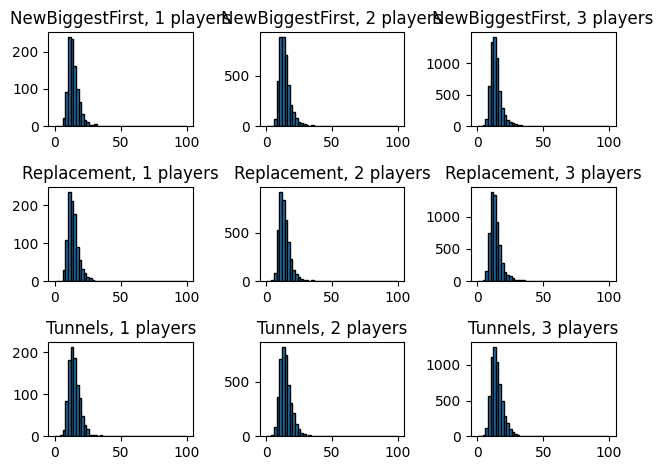

In [7]:
fig, ax = plt.subplots(3, 3)
# plt.subplots_adjust(wspace=2, hspace=2)

for i in range(3):
    for j in range(3):
        make_graph_for(players[3*i + j], ax[i][j])
        
plt.tight_layout()

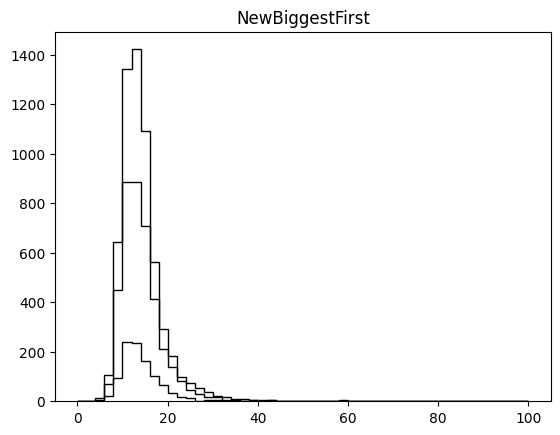

In [13]:


# def make_graph_for(player):
#     name, numplayers = player
#     query_1 = '''
#         SELECT
#             number_of_turns
#         FROM
#             player_with_numturns
#         WHERE name = '{}' AND numplayers = {}        
        
#         '''.format(name, numplayers)
#     data= run_query(
#         query_1
#     )
    
#     data = [i[0] for i in data]
#     bin_size = 2
#     mx = max(data)
#     mx = 100
#     bin_edges = range(0, mx + bin_size, bin_size)

#     # Create histogram
#     plt.hist(data, bins=bin_edges, edgecolor='black', histtype='step')
# plt.title(players[0][0])
# make_graph_for(players[0])
# make_graph_for(players[1])
# make_graph_for(players[2])
# plt.show()

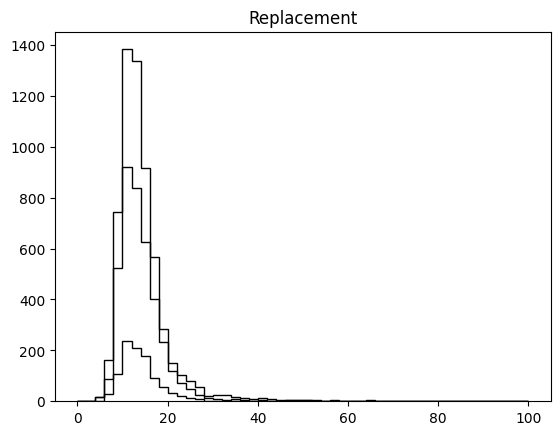

In [14]:
# plt.title(players[3][0])
# make_graph_for(players[3])
# make_graph_for(players[4])
# make_graph_for(players[5])
# plt.show()

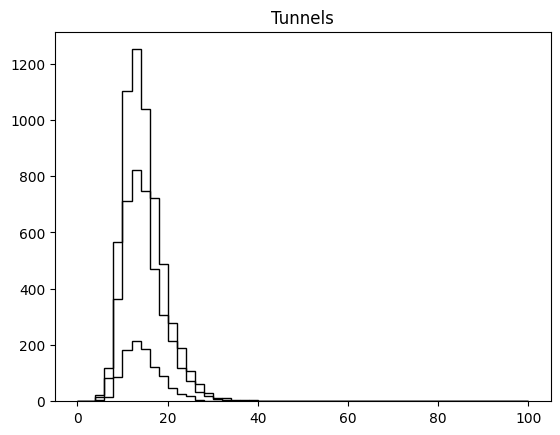

In [17]:
# plt.title(players[6][0])
# make_graph_for(players[6])
# make_graph_for(players[7])
# make_graph_for(players[8])
# plt.show()

In [26]:
import pandas as pd

def get_df(player):
    name, numplayers = player
    query_1 = '''
        SELECT
            number_of_turns
        FROM
            player_with_numturns
        WHERE name = '{}' AND numplayers = {}        
        
        '''.format(name, numplayers)
    data= run_query(
        query_1
    )
    
    data = [i[0] for i in data]

    df = pd.DataFrame({
        'numturns': data,
    })
    return df



In [27]:

# Get summary statistics
df = get_df(players[0])
statistics = df.describe()
print(players[0][0] , ',', players[0][1])
statistics

NewBiggestFirst , 1


,numturns
count,1000.000000
mean,13.578000
std,4.423967
min,4.000000
25%,11.000000
50%,13.000000
75%,15.000000
max,43.000000


In [28]:


# Get summary statistics
df = get_df(players[1])
statistics = df.describe()
print(players[1][0] , ',', players[1][1])
statistics

NewBiggestFirst , 2


,numturns
count,4000.000000
mean,13.704000
std,4.775415
min,4.000000
25%,11.000000
50%,13.000000
75%,15.000000
max,54.000000


In [29]:


# Get summary statistics
df = get_df(players[2])
statistics = df.describe()
print(players[2][0] , ',', players[2][1])
statistics

NewBiggestFirst , 3


,numturns
count,6000.000000
mean,13.620667
std,4.754739
min,4.000000
25%,11.000000
50%,13.000000
75%,15.000000
max,59.000000


In [10]:
query_1 = '''
    SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name,
        turns.turn_type as type
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id,
        turns.turn_type
    '''
query_2 = '''
    SELECT
        avg(number_of_turns),
        name,
        type
    FROM
        ({})
    GROUP BY
        name,
        type
'''.format(query_1)

data = run_query(
    query_2
)



In [ ]:

"""select name, count(game_id) from (SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name,
        turns.turn_type as type
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id,
        turns.turn_type
        ) where number_of_turns > 100 GROUP BY name"""
